# ``aggregate``: Distortions and Pricing Examples

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [3]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

# Plan

1. Set up a portfolio
2. Price with several distortions... 

In [ ]:
port = uw('''port BASE
    agg MediumCat	10 claims 	1000 x 0   sev 100 * pareto 2.1 - 100 poisson 
    agg LargeCat	1.7 claims  5000 x 0   sev 500 * pareto 1.4 - 500 poisson 
    agg Attrit		90 claims    200 x 0   sev lognorm 50 cv 3 mixed gamma 0.25
''')

In [50]:
pd.__version__

'0.23.0'

In [ ]:
port

In [ ]:
port.recommend_bucket()

In [ ]:
port.update(13, 2.5, add_exa=True, trim_df=False, remove_fuzz=True)

In [ ]:
port

In [ ]:
port.plot('audit', aspect=1.414)

In [ ]:
cal = port.calibrate_distortions(LRs =[0.86], Ps=[0.98, 0.99, 0.996], r0=0.03)
cal

In [ ]:
A = port.q(0.99)
LR = 0.86 
idx = (A, LR)
dis = agg.Distortion.distortions_from_params(cal, idx, r0=0.03, plot=True)

In [ ]:
dis['convex'] = agg.Distortion.convex_example('cat')
dis['convex'] = agg.Distortion.convex_example('bond')
dis['convex'].plot()

In [ ]:
ans_table, ans_stacked = port.apply_distortions(dis, As=[A], num_plots=0)

In [ ]:
ans_table 


In [ ]:
sns.factorplot(x='method', y='value', row='return', col='line', size=2.5, kind='bar',
                           data=ans_stacked.query(' stat=="lr" ')).set(ylim=(.5, 1.05))

In [ ]:
a, p, test, params, dd, table, stacked = port.uat(Ps=[0.99], LRs=[0.875], r0=0.03, verbose=True)

In [ ]:
port.apply_distortions(dis, As=[A], Ps=[0.99], num_plots=2)

In [ ]:
dis

# Small Medium Large example from 08-28

In [36]:
uw.log2 = 13
uw.update = True 
port2 = uw("SMALL~MEDIUM~LARGE", bs=25000, add_exa=True, trim_df=False, remove_fuzz=True)
port2 

,Large,Medium,Small,total
"(freq, mean)",1000,100,10,1110
"(freq, cv)",0.104881,0.141421,0.331662,0.0953892
"(freq, skew)",0.200227,0.212132,0.361814,0.195118
"(sev, mean)",49813.3,49813.3,498133,53852.2
"(sev, cv)",1.43008,1.43008,1.43008,1.98225
"(sev, skew)",5.03603,5.03603,5.03603,20.5752
"(agg, mean)",4.98133e+07,4.98133e+06,4.98133e+06,5.97759e+07
"(agg, cv)",0.114215,0.201125,0.560815,0.107351
"(agg, skew)",0.21022,0.405612,1.29252,0.254706
Mean,4.98133e+07,4.98133e+06,4.98133e+06,5.97759e+07


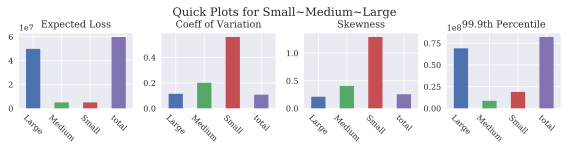

In [4]:
port2.plot('quick')

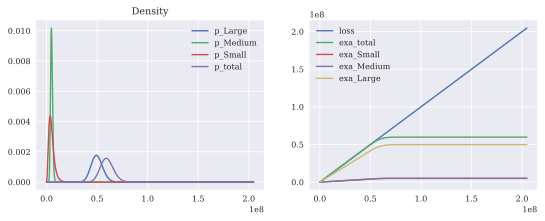

In [38]:
axiter = agg.axiter_factory(None, 2, aspect=1.5, height=3)
port2.plot('density', aspect=1.4, axiter=axiter)
port2.density_df.filter(regex='^exa_[a-zA-Z]+$|loss').plot(ax=next(axiter))

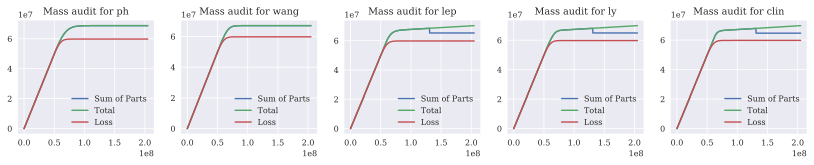

In [44]:
axiter = agg.axiter_factory(None, 5, aspect=1.414)
for d in dd.values():
    ans = port2.apply_distortion(d, axiter, 2)

,loss,S,exa_total,exa_Small,exa_Medium,exa_Large,exag_Small,exag_Medium,exag_Large,exag_sumparts,exag_total,lr_Small,lr_Medium,lr_Large,lr_total,method,return
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,7.069136e+06,5.007448e+06,5.427318e+07,6.634976e+07,6.635287e+07,0.703584,0.993996,0.916963,0.9,ph,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.508846e+06,5.094755e+06,5.474927e+07,6.635287e+07,6.635287e+07,0.764149,0.976962,0.908989,0.9,wang,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.465198e+06,5.099616e+06,5.478805e+07,6.635287e+07,6.635287e+07,0.769308,0.976031,0.908345,0.9,lep,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.405926e+06,5.113950e+06,5.483300e+07,6.635287e+07,6.635287e+07,0.776426,0.973295,0.907601,0.9,ly,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.252949e+06,5.131565e+06,5.496836e+07,6.635287e+07,6.635287e+07,0.795421,0.969954,0.905366,0.9,clin,50.0


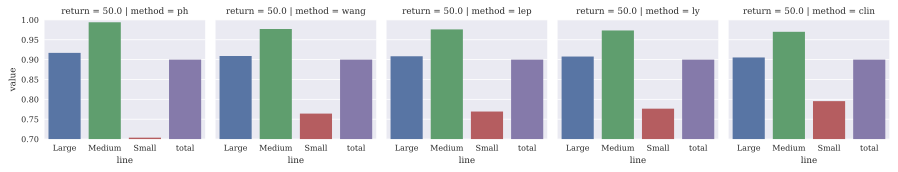

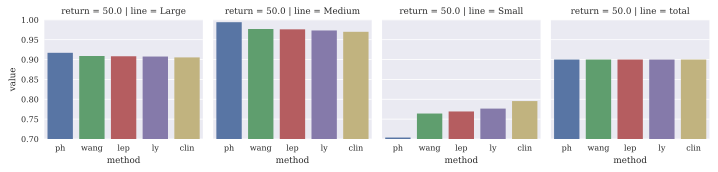

In [45]:
a, p, test, arams, dd, table, stacked = port2.uat(LRs=[0.9], r0=0.025, num_plots=0)

# Working with Meta

In [ ]:
uw = agg.Underwriter(glob=globals())

In [ ]:
port = uw('''port BASE
    agg MediumCat	10 claims 	1000 x 0   sev 100 * pareto 2.1 - 100 poisson 
    agg LargeCat	1.7 claims  5000 x 0   sev 500 * pareto 1.4 - 500 poisson 
    agg Attrit		90 claims    200 x 0   sev lognorm 50 cv 3 mixed gamma 0.25
''')
port.update(13, 2.5)
port

In [ ]:
svuc = agg.Severity(port, exp_attachment=5000, exp_limit=15000, conditional=False) # , sev_a=13, sev_b=2.5)
sv_c = agg.Severity(port, exp_attachment=2500, exp_limit=15000, conditional=True) 
sv = agg.Severity(port)

In [ ]:
svuc.moms(), sv_c.moms(), sv.moms(), port.statistics_df.loc[('agg', 'mean'), 'total']

In [ ]:
xs = port.density_df.loss.values
cdf = sv.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='approx')

cdf = svuc.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='uncond layer')

cdf = sv_c.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='cond layer')

plt.plot(xs, port.density_df.p_total, label='port')
plt.yscale('log')
plt.legend()

In [ ]:
p2 = uw('''port MP2
    agg A1 2 claims sev meta.svuc poisson''')

In [ ]:
p2.update(13, 2.5)
p2.plot(kind='density', aspect=2, logy=True)

In [ ]:
port.F(0.001)

In [ ]:
p2

# Big Example

In [64]:
port2 = uw(
"""port Program1
    agg gamm040:     50  claims,               sev  gamma 12 cv .30          mixed gamma 0.4
    agg sichel040:   50  claims                sev  lognorm 50 cv .8  mixed sichel 0.4 0.5
    agg delap:      500 loss,  1000 xs 0       sev  lognorm 50 cv .8  mixed delaporte 0.4 0.7
    agg mixedig:    500 loss,                  sev  gamma 50 cv .8    mixed ig 0.4
    agg mixedsig:   500  loss,      75 xs 25,  sev  lognorm 50 cv .9  mixed sig 0.4 0.5
    agg gamma120:    25  claims,    30 xs 20,  sev  gamma 12 cv 1.30         (mixed gamma 1.20)
    agg Cat1:       1.7 claims,                sev  25 * pareto 1.3 - 25  poisson
    agg Cat2:       3.5 claims,                sev  25 * pareto 2.3 - 25  poisson
""")

C:\Users\steve\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1038: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2
..\aggregate\utils.py:682: RuntimeWarning: invalid value encountered in sqrt
  if m == 0:
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1945: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [65]:
port2.update(16, 0.5, remove_fuzz=True, add_exa=False)

In [66]:
port2

,Cat1,Cat2,delap,gamm040,gamma120,mixedig,mixedsig,sichel040,total
"(freq, mean)",1.7,3.5,10.0001,50,25,10,15.5598,50,165.76
"(freq, cv)",0.766965,0.534522,0.509901,0.424264,1.21655,0.509902,0.473569,0.424264,0.265478
"(freq, skew)",0.766965,0.534522,1.72482,0.801388,2.40023,1.01679,1.77559,-4.05932,0.440102
"(sev, mean)",83.3333,19.2308,49.9997,12,13.9879,50,32.134,50,31.1214
"(sev, cv)",NaN,2.76887,0.79982,0.3,0.741206,0.8,0.778479,0.8,1.02532
"(sev, skew)",NaN,-3.40517,2.89376,0.6,0.373609,1.6,0.5528,2.912,3.36541
"(agg, mean)",141.667,67.3077,500,600,349.698,500,500,2500,5158.67
"(agg, cv)",NaN,1.57359,0.569184,0.42638,1.22555,0.56921,0.513046,0.43909,0.251482
"(agg, skew)",NaN,-1.01158,1.59095,0.802138,2.40088,1.04602,1.59847,-3.57316,-2.03215
Mean,141.667,67.3077,500,600,349.698,500,500,2500,5158.67


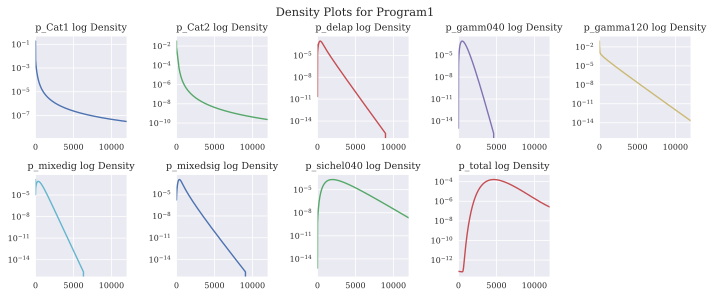

In [67]:
port2.plot(subplots=True, logy=True, xlim=(0, 12000))

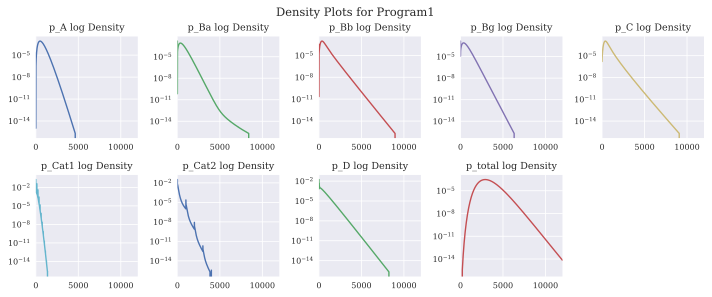

In [63]:
port2.plot(subplots=True, logy=True, xlim=(0, 12000))

In [105]:
txt = """port Program1
    agg gamm040     50  claims,               sev  gamma 12 cv .30          mixed gamma 0.4
    agg sichel040   50  claims                sev  lognorm 50 cv .8  mixed sichel 0.4 0.5
    agg delap      500 loss  1000 xs 0       sev  lognorm 50 cv .8  mixed delaporte 0.4 0.7
    agg mxedig    500 loss                  sev  gamma 50 cv .8    mixed ig 0.4
    agg mxedsig   500  loss      75 xs 25  sev  lognorm 50 cv .9  mixed sig 0.4 0.5
    agg gamma120    25  claims    30 xs 20  sev  gamma 12 cv 1.30         (mixed gamma 1.20)
    agg Cat1       1.7 claims                sev  25 * pareto 1.3 - 25  poisson
    agg Cat2       3.5 claims                sev  25 * pareto 2.3 - 25  poisson
"""

In [70]:
import re

In [71]:
?re.split

Signature: re.split(pattern, string, maxsplit=0, flags=0)
Docstring:
Split the source string by the occurrences of the pattern,
returning a list containing the resulting substrings.  If
capturing parentheses are used in pattern, then the text of all
groups in the pattern are also returned as part of the resulting
list.  If maxsplit is nonzero, at most maxsplit splits occur,
and the remainder of the string is returned as the final element
of the list.
File:      c:\users\steve\anaconda3\lib\re.py
Type:      function


In [107]:
ans

['port Program1\n    ',
 'agg',
 ' gamm040     50  claims,               ',
 'sev',
 '  gamma 12 cv .30          ',
 'mixed',
 ' gamma 0.4\n    ',
 'agg',
 ' sichel040   50  claims                ',
 'sev',
 '  lognorm 50 cv .8  ',
 'mixed',
 ' sichel 0.4 0.5\n    ',
 'agg',
 ' delap      500 loss  1000 xs 0       ',
 'sev',
 '  lognorm 50 cv .8  ',
 'mixed',
 ' delaporte 0.4 0.7\n    ',
 'agg',
 ' mxedig    500 loss                  ',
 'sev',
 '  gamma 50 cv .8    ',
 'mixed',
 ' ig 0.4\n    ',
 'agg',
 ' mxedsig   500  loss      75 xs 25  ',
 'sev',
 '  lognorm 50 cv .9  ',
 'mixed',
 ' sig 0.4 0.5\n    ',
 'agg',
 ' gamma120    25  claims    30 xs 20  ',
 'sev',
 '  gamma 12 cv 1.30         (',
 'mixed',
 ' gamma 1.20)\n    ',
 'agg',
 ' Cat1       1.7 claims                ',
 'sev',
 '  25 * pareto 1.3 - 25  ',
 'poisson',
 '\n    ',
 'agg',
 ' Cat2       3.5 claims                ',
 'sev',
 '  25 * pareto 2.3 - 25  ',
 'poisson',
 '\n']

In [140]:
clean = [re.sub(r'[ ]+', ' ', i.strip()) for i in ans]
print(clean[0])
for agg, exp, sev, sevd, fs, freq in zip(*[clean[i::6] for i in range(1,7)]):
    nm, *rest = exp.split(' ')
    print(f'\t{agg} {nm:<10s} {float(rest[0]):8.1f} {" ".join(rest[1:]):^20s} {sev} {sevd:<25s} {fs:<8s} {freq}')
#     print(f'{a:<30s}\t{b:<30s}\t{c:<30s}')

port Program1
	agg gamm040        50.0       claims,        sev gamma 12 cv .30           mixed    gamma 0.4
	agg sichel040      50.0        claims        sev lognorm 50 cv .8          mixed    sichel 0.4 0.5
	agg delap         500.0    loss 1000 xs 0    sev lognorm 50 cv .8          mixed    delaporte 0.4 0.7
	agg mxedig        500.0         loss         sev gamma 50 cv .8            mixed    ig 0.4
	agg mxedsig       500.0    loss 75 xs 25     sev lognorm 50 cv .9          mixed    sig 0.4 0.5
	agg gamma120       25.0   claims 30 xs 20    sev gamma 12 cv 1.30 (        mixed    gamma 1.20)
	agg Cat1            1.7        claims        sev 25 * pareto 1.3 - 25      poisson  
	agg Cat2            3.5        claims        sev 25 * pareto 2.3 - 25      poisson  


In [155]:
from io import StringIO

In [159]:
def tidy_agg(txt):
    """
    guess a nice format for an agg program 
    """
    bits = re.split(r'(agg|sev|mixed|poisson|fixed)', txt)
    clean = [re.sub(r'[ ]+', ' ', i.strip()) for i in bits]
    sio = StringIO()
    sio.write(clean[0])
    for agg, exp, sev, sevd, fs, freq in zip(*[clean[i::6] for i in range(1,7)]):
        nm, *rest = exp.split(' ')
        sio.write(f'\n\t{agg} {nm:^12s} {float(rest[0]):8.1f} {" ".join(rest[1:]):^20s} {sev} {sevd:^25s} {fs:>8s}   {freq}')
    return sio.getvalue()

In [160]:
print(tidy_agg(txt))

port Program1
	agg   gamm040        50.0       claims,        sev      gamma 12 cv .30         mixed   gamma 0.4
	agg  sichel040       50.0        claims        sev     lognorm 50 cv .8         mixed   sichel 0.4 0.5
	agg    delap        500.0    loss 1000 xs 0    sev     lognorm 50 cv .8         mixed   delaporte 0.4 0.7
	agg    mxedig       500.0         loss         sev      gamma 50 cv .8          mixed   ig 0.4
	agg   mxedsig       500.0    loss 75 xs 25     sev     lognorm 50 cv .9         mixed   sig 0.4 0.5
	agg   gamma120       25.0   claims 30 xs 20    sev    gamma 12 cv 1.30 (        mixed   gamma 1.20)
	agg     Cat1          1.7        claims        sev   25 * pareto 1.3 - 25     poisson   
	agg     Cat2          3.5        claims        sev   25 * pareto 2.3 - 25     poisson   


In [175]:
def html_agg(txt):
    """
    guess a nice format for an agg program 
    """
    bits = re.split(r'(agg|sev|mixed|poisson|fixed)', txt)
    clean = [re.sub(r'[ ]+', ' ', i.strip()) for i in bits]
    sio = StringIO()
    sio.write(f'<b>{clean[0]}</b>')
    for agg, exp, sev, sevd, fs, freq in zip(*[clean[i::6] for i in range(1,7)]):
        nm, *rest = exp.split(' ')
        sio.write(f'<br><span style="color: red">{agg}</span> {nm:^12s} {float(rest[0]):8.1f} {" ".join(rest[1:]):^20s} <span style="color:green"><b>{sev}</b></span> {sevd:^25s} '
                  f'<span style="color:purple"><b>{fs:>8s}</b></span>   {freq}')
    return sio.getvalue()

In [176]:
display(HTML(html_agg(txt)))

# One Percent Insurance Company

In [5]:
np.exp(19.9 + 2.36**2/2) /  1e6, 172.4 * np.exp(2.7**2/2), np.exp(2.36**2/2), np.exp(19.9) / 1e6

(7110.2269494073043,
 6599.9500396085987,
 16.196578237162058,
 438.99562273550583)

In [6]:
uw.update = False
pgm = f'''
port OnePercentInsCo
	agg Cat        1.75 claims sev {0.01 * np.exp(19.9):.1f} * lognorm 2.36 poisson
	agg PPA    {0.01 * 20e6} claims sev    {6600 * np.exp(-2.7**2 / 2):.2f} * lognorm 2.70 mixed gamma 0.075'''
print(pgm)
bk = uw(pgm)


port OnePercentInsCo
	agg Cat        1.75 claims sev 4389956.2 * lognorm 2.36 poisson
	agg PPA    200000.0 claims sev    172.40 * lognorm 2.70 mixed gamma 0.075


,Cat,PPA,total
"(freq, mean)",1.75,200000,200002
"(freq, cv)",0.755929,0.0750333,0.0750327
"(freq, skew)",0.755929,0.15,0.15
"(sev, mean)",2.84467e+06,6599.95,6624.78
"(sev, cv)",0.619698,21.6937,21.6637
"(sev, skew)",-0.467604,-0.138387,0.000476053
"(agg, mean)",4.97818e+06,1.31999e+09,1.32497e+09
"(agg, cv)",0.88931,0.0893481,0.0890751
"(agg, skew)",0.947468,0.144508,0.144253
Mean,4.97818e+06,1.31999e+09,1.32497e+09


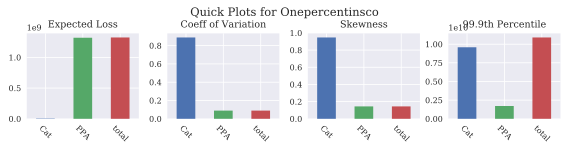

In [24]:
bk.update(20, 1e6, padding=2, remove_fuzz=True, add_exa=True, trim_df=False)
bk.plot('quick')
bk

In [ ]:
axiter = agg.axiter_factory(None, 6, nr=3, aspect=1.414, height=2.5)
bk.plot(subplots=True, axiter=axiter, logy=True, xlim=[0, 2e9], ylim=[1e-8, 1])
bk.plot(subplots=True, axiter=axiter, logy=True, logx=True)

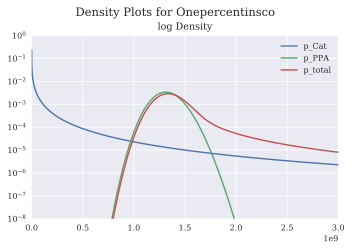

In [20]:
bk.plot(figsize=(5, 3.5), logy=True, xlim=[0, 3e9], ylim=[1e-8, 1])
plt.savefig('/s/telos/notes/img/onepercentco-density.pdf')

In [9]:
aggq = np.vectorize(bk.q) 
cataggq = np.vectorize(bk.agg_list[0].q)
autoaggq = np.vectorize(bk.agg_list[1].q)
catoccq = bk.agg_list[0].sevs[0].ppf

In [21]:
ps = np.array([0.9, 0.95, 0.98, 0.99, 0.995, 0.996, 0.999, 0.9995, 0.9999, 0.99995, 0.99999])
df = pd.DataFrame(dict(ps = ps, cat_occ = catoccq(ps), cat_agg = cataggq(ps), auto_agg = autoaggq(ps), total_agg = aggq(ps)))
df['total_agg / cat_occ'] = df.total_agg / df.cat_occ
df['total_agg - cat_occ'] = df.total_agg - df.cat_occ * 1.75
df['total_agg - cat_agg -E(auto)'] = df.total_agg - 1.32e9 - df.cat_agg
df['cat_agg / cat_occ'] = df.cat_agg / df.cat_occ
df

,ps,cat_occ,cat_agg,auto_agg,total_agg,total_agg / cat_occ,total_agg - cat_occ,total_agg - cat_agg -E(auto),cat_agg / cat_occ
0,0.90000,9.035813e+07,1.970000e+08,1.472000e+09,1.596000e+09,17.663049,1.437873e+09,79000000.0,2.180213
1,0.95000,2.129748e+08,4.220000e+08,1.518000e+09,1.777000e+09,8.343710,1.404294e+09,35000000.0,1.981455
2,0.98000,5.590096e+08,9.990000e+08,1.571000e+09,2.333000e+09,4.173452,1.354733e+09,14000000.0,1.787089
3,0.99000,1.063691e+09,1.789000e+09,1.606000e+09,3.117000e+09,2.930362,1.255541e+09,8000000.0,1.681879
4,0.99500,1.916539e+09,3.073000e+09,1.640000e+09,4.398000e+09,2.294761,1.044056e+09,5000000.0,1.603411
5,0.99600,2.294348e+09,3.630000e+09,1.650000e+09,4.955000e+09,2.159655,9.398910e+08,5000000.0,1.582149
6,0.99900,6.452788e+09,9.581000e+09,1.709000e+09,1.090300e+10,1.689657,-3.893782e+08,2000000.0,1.484785
7,0.99950,1.035228e+10,1.501600e+10,1.736000e+09,1.633700e+10,1.578106,-1.779495e+09,1000000.0,1.450501
8,0.99990,2.845839e+10,3.960900e+10,1.796000e+09,4.093000e+10,1.438240,-8.872175e+09,1000000.0,1.391822
9,0.99995,4.266423e+10,5.853600e+10,1.820000e+09,5.985600e+10,1.402955,-1.480640e+10,0.0,1.372016


In [51]:
tabulate(df)

|    ps |          cat_occ |          cat_agg |       auto_agg |        total_agg |   total_agg / cat_occ |   total_agg - cat_occ |   total_agg - cat_agg -E(auto) |   cat_agg / cat_occ |
|------:|-----------------:|-----------------:|---------------:|-----------------:|----------------------:|----------------------:|-------------------------------:|--------------------:|
| 0.900 |     90358125     |    197000000     | 1472000000     |   1596000000     |                17.663 |        1437873280     |                   79000000     |               2.180 |
| 0.950 |    212974791     |    422000000     | 1518000000     |   1777000000     |                 8.344 |        1404294114     |                   35000000     |               1.981 |
| 0.980 |    559009618     |    999000000     | 1571000000     |   2333000000     |                 4.173 |        1354733168     |                   14000000     |               1.787 |
| 0.990 |   1063691019     |   1789000000     | 1606000000     | 

In [12]:
0.08*6600

528.0

In [22]:
ef = pd.DataFrame(dict(xss = np.linspace(1e9, 1e11, 10)))
ef['occ'] = bk.agg_list[0].sevs[0].sf(ef.xss)
ef['agg'] = bk.agg_list[0].sf(ef.xss)
ef['agg/occ'] = ef['agg'] / ef['occ']
ef = ef.set_index('xss')
ef

,occ,agg,agg/occ
xss,,,
1.000000e+09,0.010719,0.019967,1.862801
1.200000e+10,0.000400,0.000710,1.775789
2.300000e+10,0.000142,0.000251,1.764599
3.400000e+10,0.000074,0.000130,1.759366
4.500000e+10,0.000046,0.000080,1.755819
5.600000e+10,0.000031,0.000054,1.752878
6.700000e+10,0.000022,0.000039,1.750136
7.800000e+10,0.000017,0.000030,1.747402
8.900000e+10,0.000013,0.000023,1.744573


In [61]:
ef.occ = 1/ef.occ
ef['agg']  = 1/ef['agg']
# ef = ef.reset_index()

In [62]:
ef

,xss,occ,agg,agg/occ
0,1.000000e+09,93.293351,50.082302,1.862801
1,1.200000e+10,2502.860622,1409.435685,1.775789
2,2.300000e+10,7023.473946,3980.208898,1.764599
3,3.400000e+10,13513.719671,7681.015658,1.759366
4,4.500000e+10,21956.406211,12504.936363,1.755819
5,5.600000e+10,32364.092390,18463.399972,1.752878
6,6.700000e+10,44761.080517,25575.769206,1.750136
7,7.800000e+10,59177.195489,33865.812585,1.747402
8,8.900000e+10,75645.073176,43360.218762,1.744573
9,1.000000e+11,94198.810955,54087.903961,1.741587


In [63]:
tabulate(ef)

|              xss |       occ |       agg |   agg/occ |
|-----------------:|----------:|----------:|----------:|
|   1000000000     |    93.293 |    50.082 |     1.863 |
|  12000000000     |  2502     |  1409     |     1.776 |
|  23000000000     |  7023     |  3980     |     1.765 |
|  34000000000     | 13513     |  7681     |     1.759 |
|  45000000000     | 21956     | 12504     |     1.756 |
|  56000000000     | 32364     | 18463     |     1.753 |
|  67000000000     | 44761     | 25575     |     1.750 |
|  78000000000     | 59177     | 33865     |     1.747 |
|  89000000000     | 75645     | 43360     |     1.745 |
| 100000000000     | 94198     | 54087     |     1.742 |


In [52]:
ef

,occ,agg,agg/occ
xss,,,
1.000000e+09,0.010719,0.019967,1.862801
1.200000e+10,0.000400,0.000710,1.775789
2.300000e+10,0.000142,0.000251,1.764599
3.400000e+10,0.000074,0.000130,1.759366
4.500000e+10,0.000046,0.000080,1.755819
5.600000e+10,0.000031,0.000054,1.752878
6.700000e+10,0.000022,0.000039,1.750136
7.800000e+10,0.000017,0.000030,1.747402
8.900000e+10,0.000013,0.000023,1.744573


In [84]:
bk._add_exa()

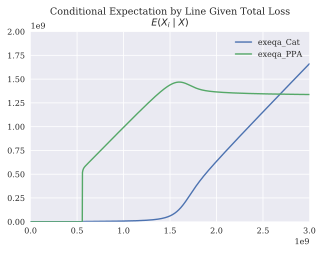

In [42]:
f, ax = plt.subplots(1,1, figsize=(5, 3.5))
bk.density_df[['exeqa_Cat', 'exeqa_PPA']].plot(ax=ax, logy=False, logx=False, ylim=[0, 2e9], xlim=[0e9, 3e9], 
                                               title='Conditional Expectation by Line Given Total Loss\n$E(X_i \mid X)$')
plt.savefig('/s/telos/notes/img/onepercentco-exeqa.pdf')

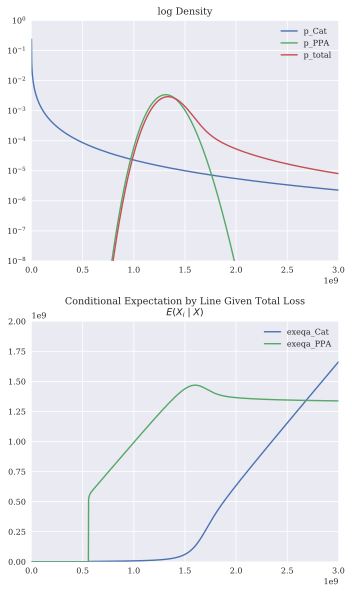

In [46]:
axiter = agg.axiter_factory(None, 2, aspect=1.25, height=4, nr=1)
bk.plot(axiter=axiter, logy=True, xlim=[0, 3e9], ylim=[1e-8, 1])
bk.density_df[['exeqa_Cat', 'exeqa_PPA']].plot(ax=next(axiter), logy=False, logx=False, ylim=[0, 2e9], xlim=[0e9, 3e9], 
                                               title='Conditional Expectation by Line Given Total Loss\n$E(X_i \mid X)$')
plt.tight_layout()
plt.savefig('/s/telos/notes/img/onepercentco.pdf')


port EffronInsCo
	agg Cat        1 claims sev gamma 200000 cv 1.2 fixed
	agg PPA      1000 claims sev gamma 100 cv 0.5 mixed gamma 0.075 


..\aggregate\utils.py:701: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1945: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


,Cat,PPA,total
"(freq, mean)",1,1000,1001
"(freq, cv)",0,0.0813941,0.0813128
"(freq, skew)",NaN,0.150502,0.150502
"(sev, mean)",200000,100,299.7
"(sev, cv)",NaN,0.5,9.52003
"(sev, skew)",NaN,1,3257.31
"(agg, mean)",200000,100000,300000
"(agg, cv)",NaN,0.0829156,NaN
"(agg, skew)",NaN,0.151304,NaN
Mean,200000,100000,300000


,ps,cat_occ,cat_agg,auto_agg,agg,agg / cat_occ,agg - cat_occ,agg - cat_agg -E(auto),cat_agg / cat_occ
0,0.90000,5.029768e+05,400300.0,110750.0,460450.0,0.915450,-4.197594e+05,-1.319940e+09,0.795862
1,0.95000,6.827082e+05,496080.0,113980.0,538660.0,0.789005,-6.560794e+05,-1.319957e+09,0.726635
2,0.98000,9.255916e+05,579130.0,117690.0,601840.0,0.650222,-1.017945e+06,-1.319977e+09,0.625686
3,0.99000,1.112030e+06,614370.0,120200.0,627150.0,0.563968,-1.318903e+06,-1.319987e+09,0.552476
4,0.99500,1.300143e+06,634030.0,122530.0,640850.0,0.492907,-1.634400e+06,-1.319993e+09,0.487662
5,0.99600,1.360993e+06,638150.0,123250.0,643680.0,0.472949,-1.738057e+06,-1.319994e+09,0.468886
6,0.99900,1.741501e+06,650940.0,127420.0,652380.0,0.374608,-2.395246e+06,-1.319999e+09,0.373781
7,0.99950,1.933036e+06,653140.0,129350.0,653860.0,0.338255,-2.728953e+06,-1.319999e+09,0.337883
8,0.99990,2.380168e+06,654910.0,133540.0,655050.0,0.275212,-3.510244e+06,-1.320000e+09,0.275153
9,0.99995,2.573563e+06,655130.0,135250.0,655200.0,0.254589,-3.848536e+06,-1.320000e+09,0.254561


,occ,agg,agg/occ
xss,,,
1.000000e+09,0.0,-224.653727,-inf
1.200000e+10,0.0,-2697.465285,-inf
2.300000e+10,0.0,-5170.276843,-inf
3.400000e+10,0.0,-7643.088401,-inf
4.500000e+10,0.0,-10115.899959,-inf
5.600000e+10,0.0,-12588.711518,-inf
6.700000e+10,0.0,-15061.523076,-inf
7.800000e+10,0.0,-17534.334634,-inf
8.900000e+10,0.0,-20007.146192,-inf


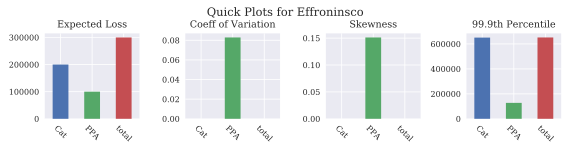

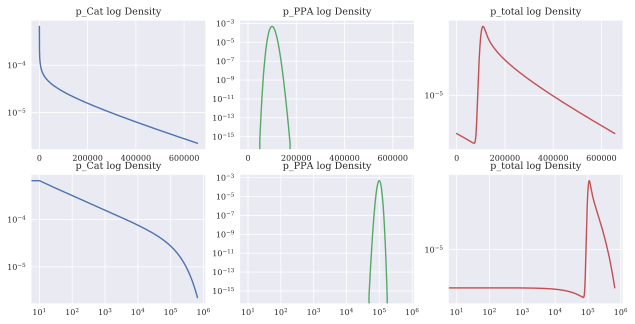

In [70]:
uw.update = False
pgm = f'''
port EffronInsCo
	agg Cat        1 claims sev gamma 200000 cv 1.2 fixed
	agg PPA      1000 claims sev gamma 100 cv 0.5 mixed gamma 0.075 '''
print(pgm)
bk = uw(pgm)

bk.update(16, 10, padding=0, remove_fuzz=True, add_exa=True, trim_df=False, approx_freq_ge=1e6)
bk.plot('quick')
display(bk)

axiter = agg.axiter_factory(None, 6, nr=3, aspect=1.414, height=2.5)
bk.plot(subplots=True, axiter=axiter, logy=True)
bk.plot(subplots=True, axiter=axiter, logy=True, logx=True)

aggq = np.vectorize(bk.q) 
cataggq = np.vectorize(bk.agg_list[0].q)
autoaggq = np.vectorize(bk.agg_list[1].q)
catoccq = bk.agg_list[0].sevs[0].ppf

ps = np.array([0.9, 0.95, 0.98, 0.99, 0.995, 0.996, 0.999, 0.9995, 0.9999, 0.99995, 0.99999])
df = pd.DataFrame(dict(ps = ps, cat_occ = catoccq(ps), cat_agg = cataggq(ps), auto_agg = autoaggq(ps), agg = aggq(ps)))
df['agg / cat_occ'] = df['agg'] / df.cat_occ
df['agg - cat_occ'] = df['agg'] - df.cat_occ * 1.75
df['agg - cat_agg -E(auto)'] = df['agg'] - 1.32e9 - df.cat_agg
df['cat_agg / cat_occ'] = df['cat_agg'] / df.cat_occ
display(df)

ef = pd.DataFrame(dict(xss = np.linspace(1e9, 1e11, 10)))
ef['occ'] = bk.agg_list[0].sevs[0].sf(ef.xss)
ef['agg'] = bk.agg_list[0].sf(ef.xss)
ef['agg/occ'] = ef['agg'] / ef['occ']
ef = ef.set_index('xss')
display(ef)

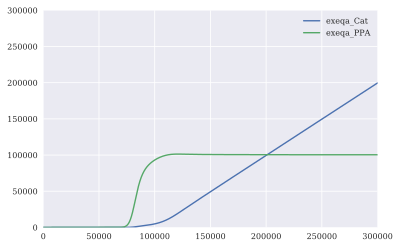

In [71]:
bk.density_df[['exeqa_Cat', 'exeqa_PPA']].plot(logy=False, logx=False, ylim=[0, 3e5], xlim=[0, 3e5])

In [66]:
bk

,Cat,PPA,total
"(freq, mean)",2,1000,1002
"(freq, cv)",0.707107,0.0813941,0.0812439
"(freq, skew)",0.707107,0.150502,0.150438
"(sev, mean)",100000,100,299.401
"(sev, cv)",0.5,0.5,16.6575
"(sev, skew)",0.999977,1,29.9895
"(agg, mean)",200000,100000,300000
"(agg, cv)",0.790569,0.0829156,0.52777
"(agg, skew)",0.948682,0.151304,0.944804
Mean,200000,100000,300000


# One Percent with Radical Frequency Uncertainty for Auto

In [93]:
uw.update = False
pgm = f'''
port OnePercentInsCo
	agg Cat        1.75 claims sev {0.01 * np.exp(19.9):.1f} * lognorm 2.36 poisson
	agg PPA    {0.01 * 20e6} claims sev    {6600 * np.exp(-2.7**2 / 2):.2f} * lognorm 2.70 mixed sig 0.075 0.9'''
print(pgm)
bk = uw(pgm)

bk.update(21, 1e6, padding=1, remove_fuzz=True, add_exa=True, trim_df=False, approx_freq_ge=1e6)
bk.plot('quick')
display(bk)

axiter = agg.axiter_factory(None, 6, nr=3, aspect=1.414, height=2.5)
bk.plot(subplots=True, axiter=axiter, logy=True)
bk.plot(subplots=True, axiter=axiter, logy=True, logx=True)

aggq = np.vectorize(bk.q) 
cataggq = np.vectorize(bk.agg_list[0].q)
autoaggq = np.vectorize(bk.agg_list[1].q)
catoccq = bk.agg_list[0].sevs[0].ppf

ps = np.array([0.9, 0.95, 0.98, 0.99, 0.995, 0.996, 0.999, 0.9995, 0.9999, 0.99995, 0.99999])
df = pd.DataFrame(dict(ps = ps, cat_occ = catoccq(ps), cat_agg = cataggq(ps), auto_agg = autoaggq(ps), agg = aggq(ps)))
df['agg / cat_occ'] = df['agg'] / df.cat_occ
df['agg - cat_occ'] = df['agg'] - df.cat_occ * 1.75
df['agg - cat_agg -E(auto)'] = df['agg'] - 1.32e9 - df.cat_agg
df['cat_agg / cat_occ'] = df['cat_agg'] / df.cat_occ
display(df)

ef = pd.DataFrame(dict(xss = np.linspace(1e9, 1e11, 10)))
ef['occ'] = bk.agg_list[0].sevs[0].sf(ef.xss)
ef['agg'] = bk.agg_list[0].sf(ef.xss)
ef['agg/occ'] = ef['agg'] / ef['occ']
ef = ef.set_index('xss')
display(ef)

bk.density_df[['exeqa_Cat', 'exeqa_PPA']].plot(logy=False, logx=False, ylim=[0, 3e9], xlim=[6e8, 5e9])




port OnePercentInsCo
	agg Cat        1.75 claims sev 4389956.2 * lognorm 2.36 poisson
	agg PPA    200000.0 claims sev    172.40 * lognorm 2.70 mixed sig 0.075 0.9


KeyError: MemoryError()